In [149]:
import pandas as pd
import re
import os
import importlib
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.simplefilter('always')

from scripts.a_data_loading_cleaning import run_load_clean_diagnose_data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Loading & Cleaning

In [ ]:
csv_path = "results/controlled_results.csv"
df = run_load_clean_diagnose_data(csv_path)

✅ All rows have consistent 'total_generated_tokens' = 16384
----------------------------------------------------------------------------------------------------
⚠️ FLOPs values are NOT constant: [1.6949971e+13 0.0000000e+00]
Original distribution:
flops
0.000000e+00    185
1.694997e+13    798
Name: count, dtype: int64
- Dominant FLOPs value: 16949970993152.0
- Affected rows count: 185
- Affected row indices: [329, 330, 331, 342, 343, 345, 346, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 459, 460, 461, 462, 46

/Users/henrybaker/repositories/thesis_analysis/scripts/a_data_loading_cleaning.py:574: UserWarning: ⚠️ FLOPs values are NOT constant: [1.6949971e+13 0.0000000e+00]
  verify_flops(df)


Index(['config_name', 'experiment_id', 'date_time', 'model', 'num_processes',
       'batch_size___fixed_batching', 'decoder_temperature', 'decoder_top_k',
       'decoder_top_p', 'latency_simulation_simulate',
       'latency_simulation_delay_max', 'latency_simulation_delay_min',
       'latency_simulation_simulate_burst', 'latency_simulation_burst_size',
       'latency_simulation_burst_interval', 'fp_precision', 'quantization',
       'load_in_8bit', 'load_in_4bit', 'total_input_tokens',
       'total_generated_tokens', 'date_time', 'total_params',
       'max_input_tokens', 'max_output_tokens', 'number_input_prompts',
       'total_energy_kwh', 'total_energy_joules', 'flops', 'tokens_per_joule',
       'joules_per_token', 'flops_per_joule', 'joules_per_flop',
       'total_inference_time_sec', 'average_latency_ms_per_batch',
       'throughput_queries_per_sec', 'throughput_tokens_per_sec',
       'total_energy_kwh_process_0', 'total_energy_kwh_process_1',
       'total_energy_kwh_p

In [151]:
df['flops'] = 16949970993152.0
df['flops_per_token'] = df['flops'] / df['total_generated_tokens']

# Exploratory Data Analysis (EDA)

📊 Plotting histogram...


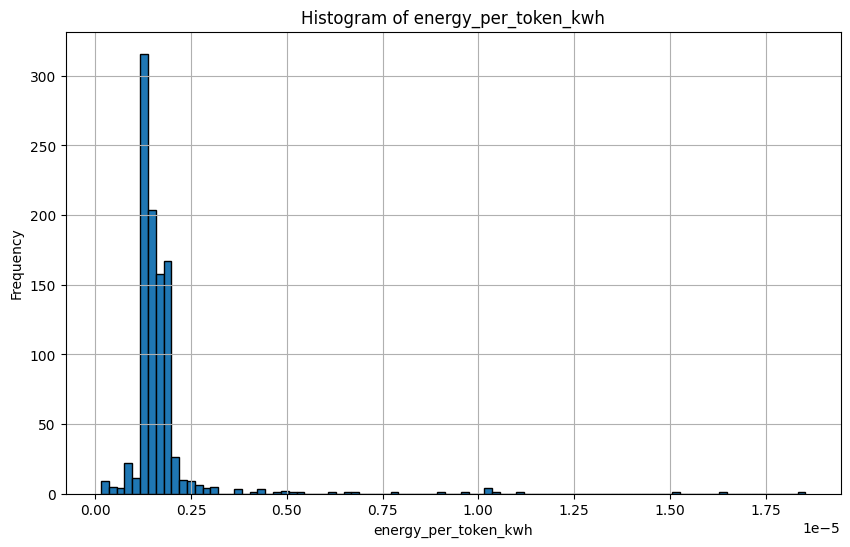

📦 Plotting boxplot...


/Users/henrybaker/repositories/thesis_analysis/scripts/b_exploratory_data_analysis.py:28: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  plt.boxplot(data[column].dropna(), vert=False)


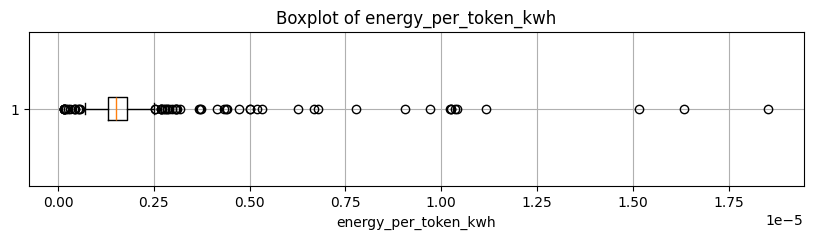

🔬 Scatter: Energy vs FLOPs...


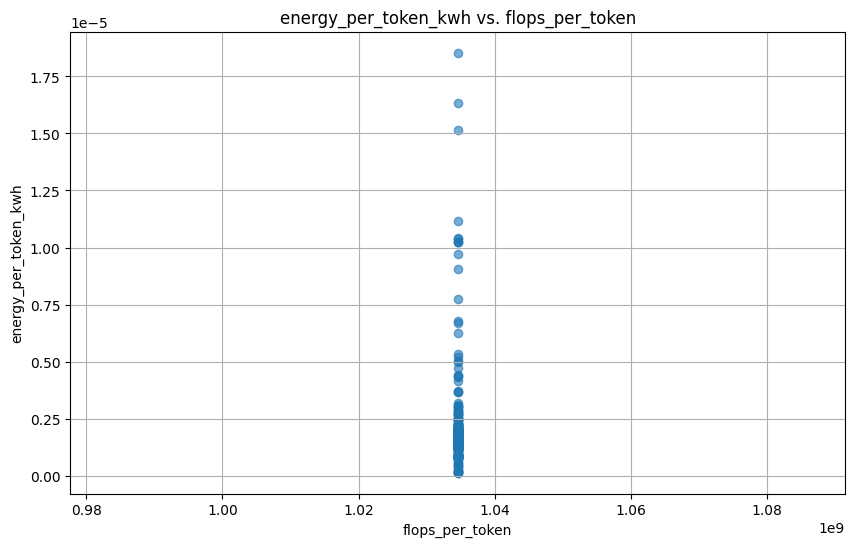

📈 Scatter: Divergence vs Batch Size...


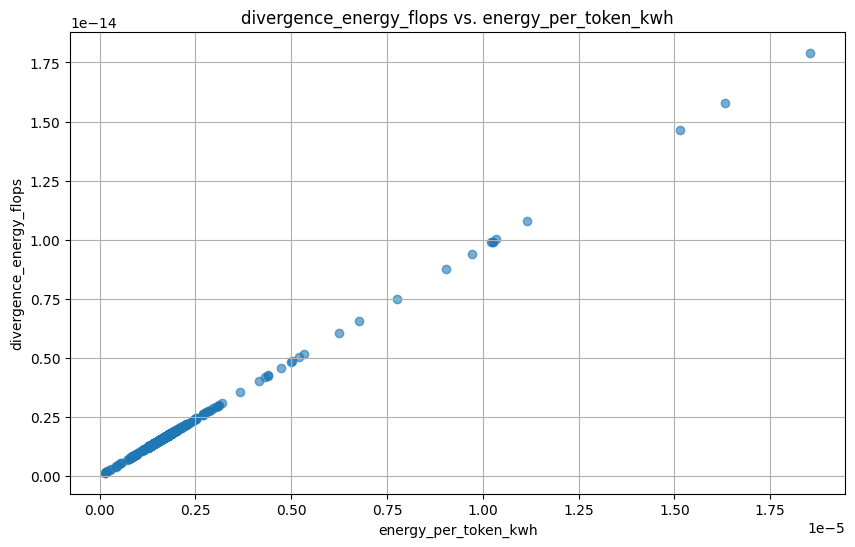

🔗 Correlation matrix...


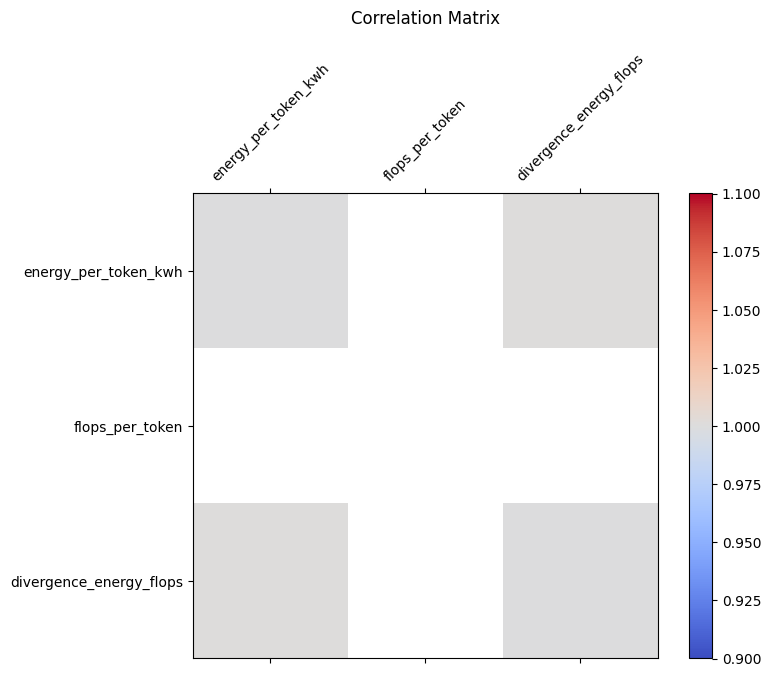

In [152]:
from scripts.b_exploratory_data_analysis import (
    plot_histogram,
    plot_boxplot,
    plot_scatter,
    plot_divergence,
    plot_correlation_matrix,
    plot_all_diagnostics
)

plot_all_diagnostics(df)

To do: 
- [ ] crop outliers temporarily -> look at closer grouped in more detail
- [ ] examine the divergence plot more

# Controlled Experiment Visualisation

NB: THE STD ERROR BAR EXTENDS BEYOND THE RAW OBSERVATIONS????

- [ ] FLOPs to be visually diff
- [ ] decoder temp yaxis not normalising
- [ ] if decoder temp remains a mess, print stratified by cycle

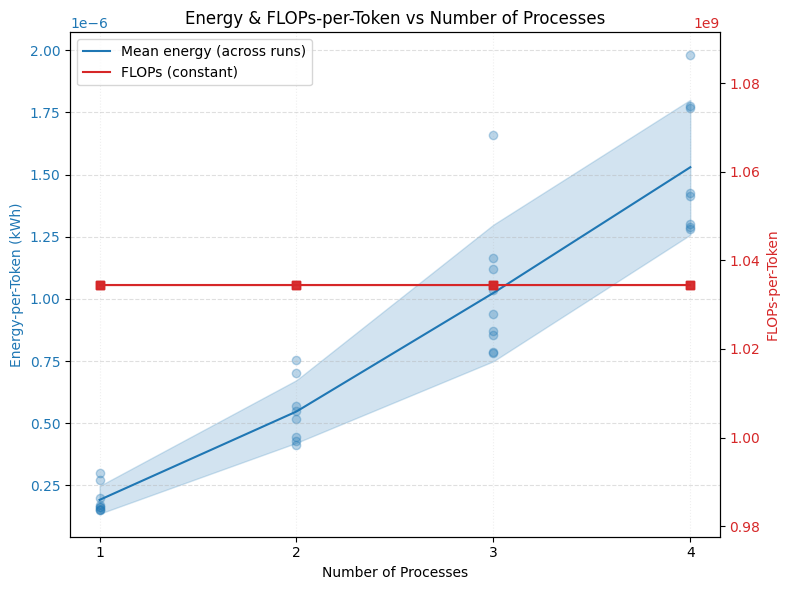

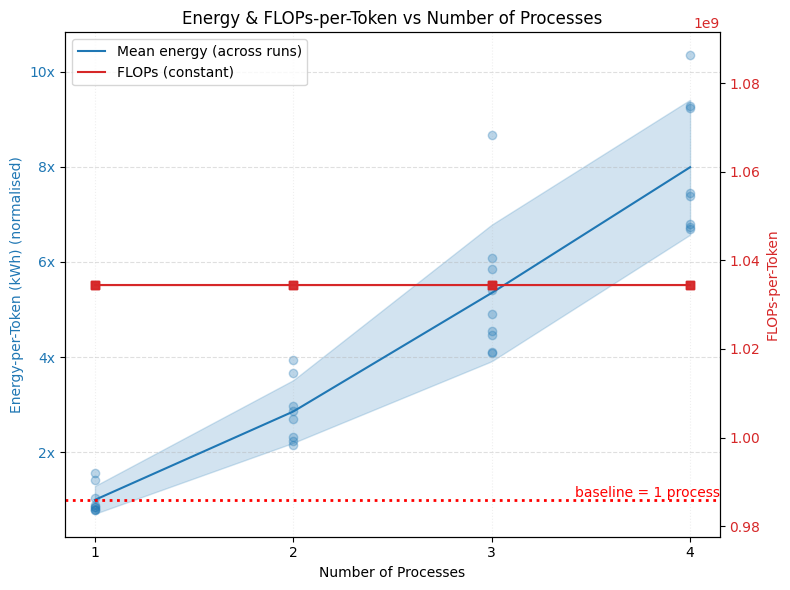

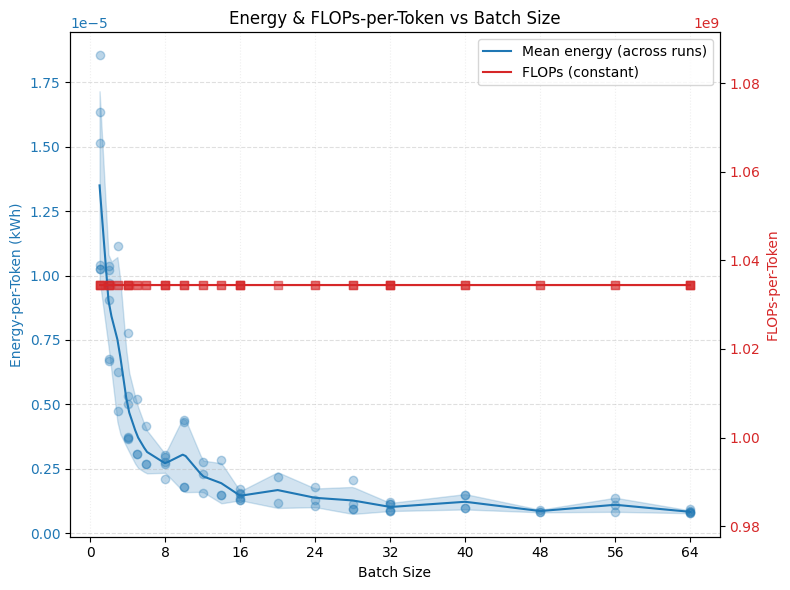

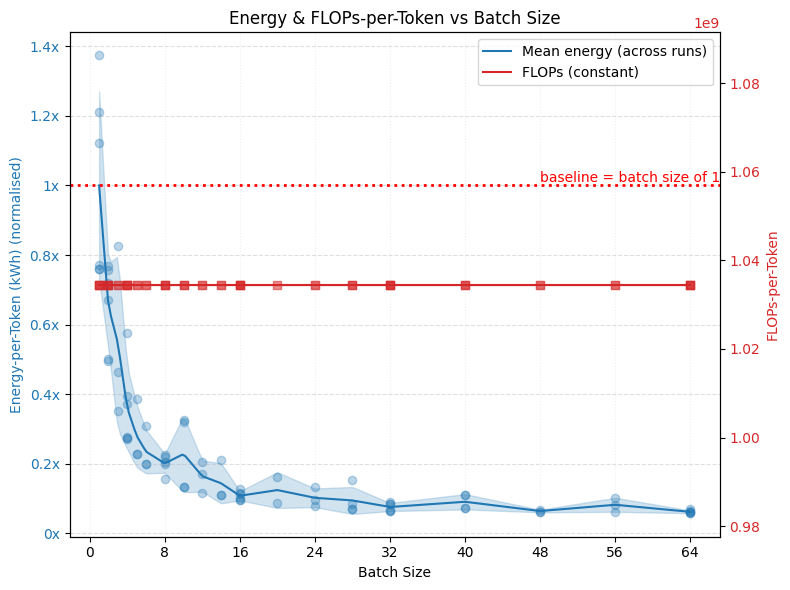

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:242: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def mode(r):
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:246: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return 'FP32'


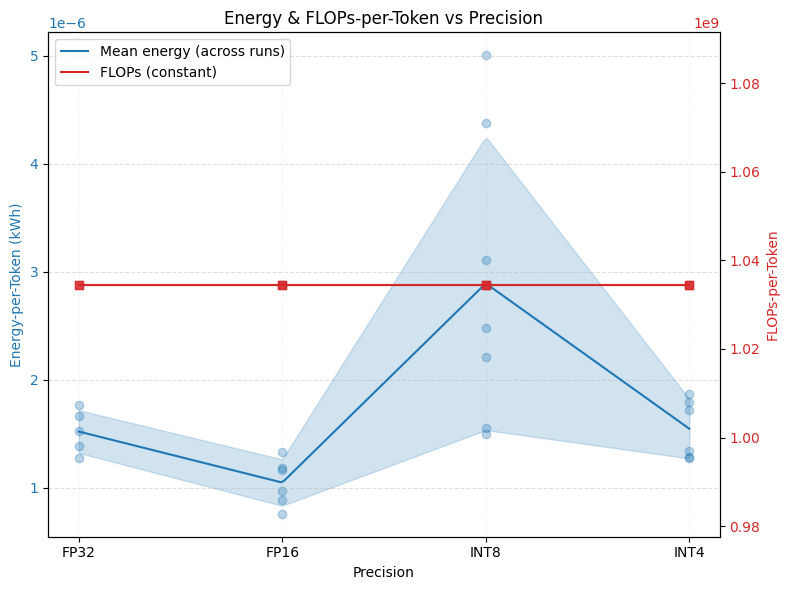

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:242: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  def mode(r):
/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:246: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return 'FP32'


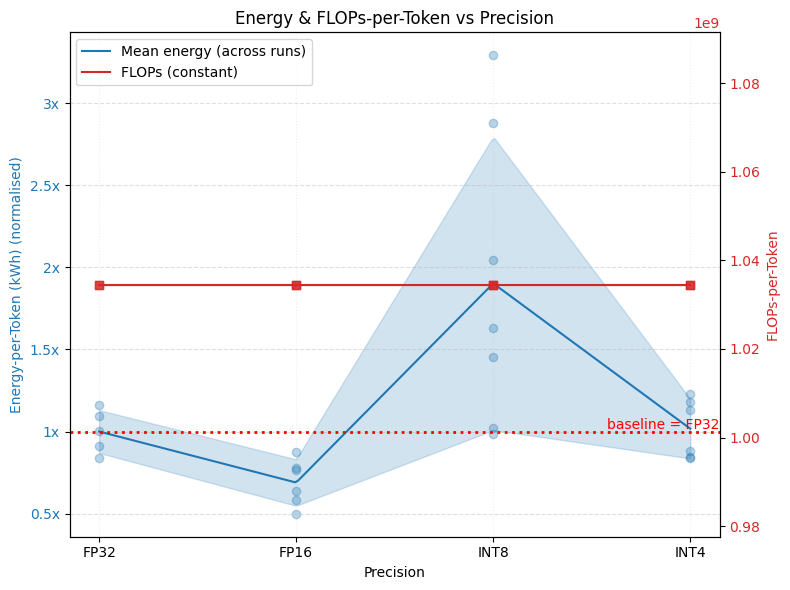

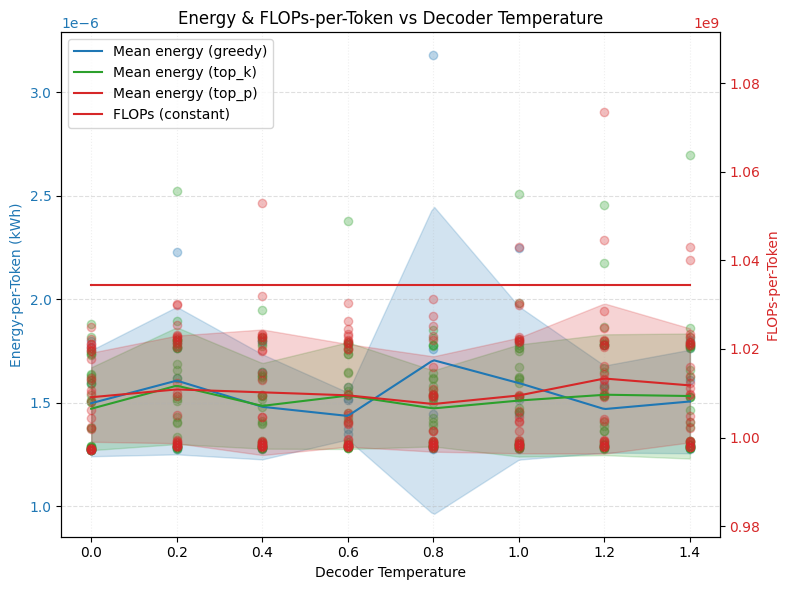

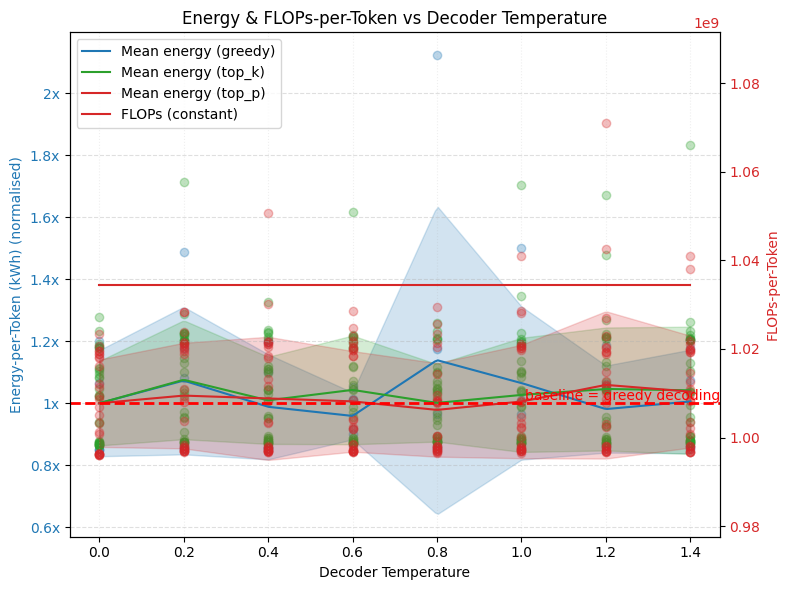

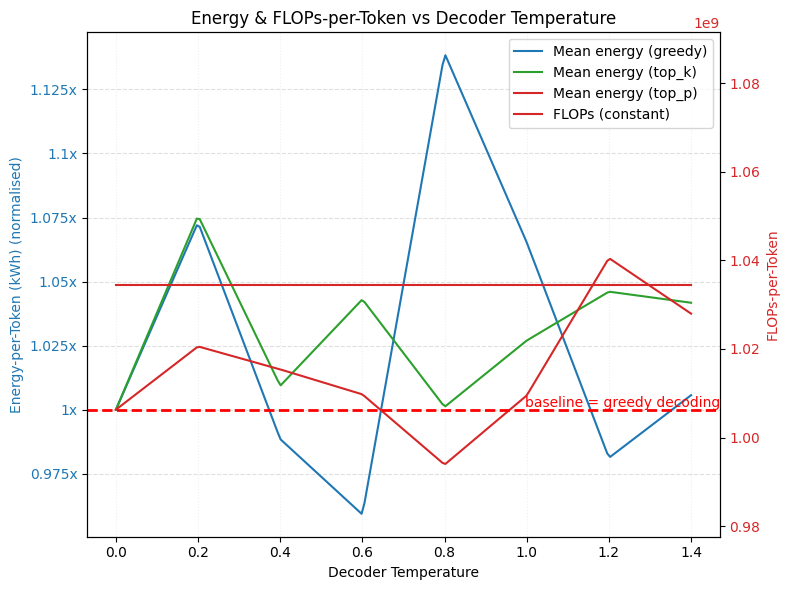

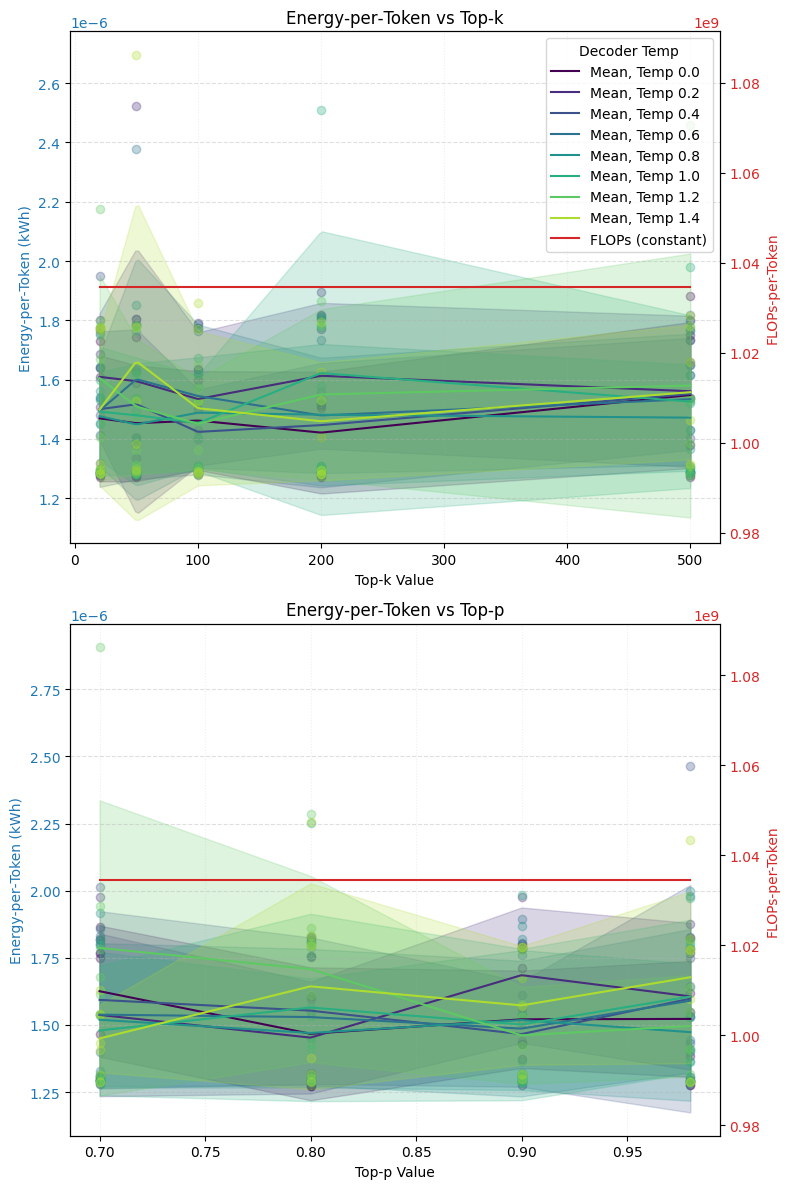

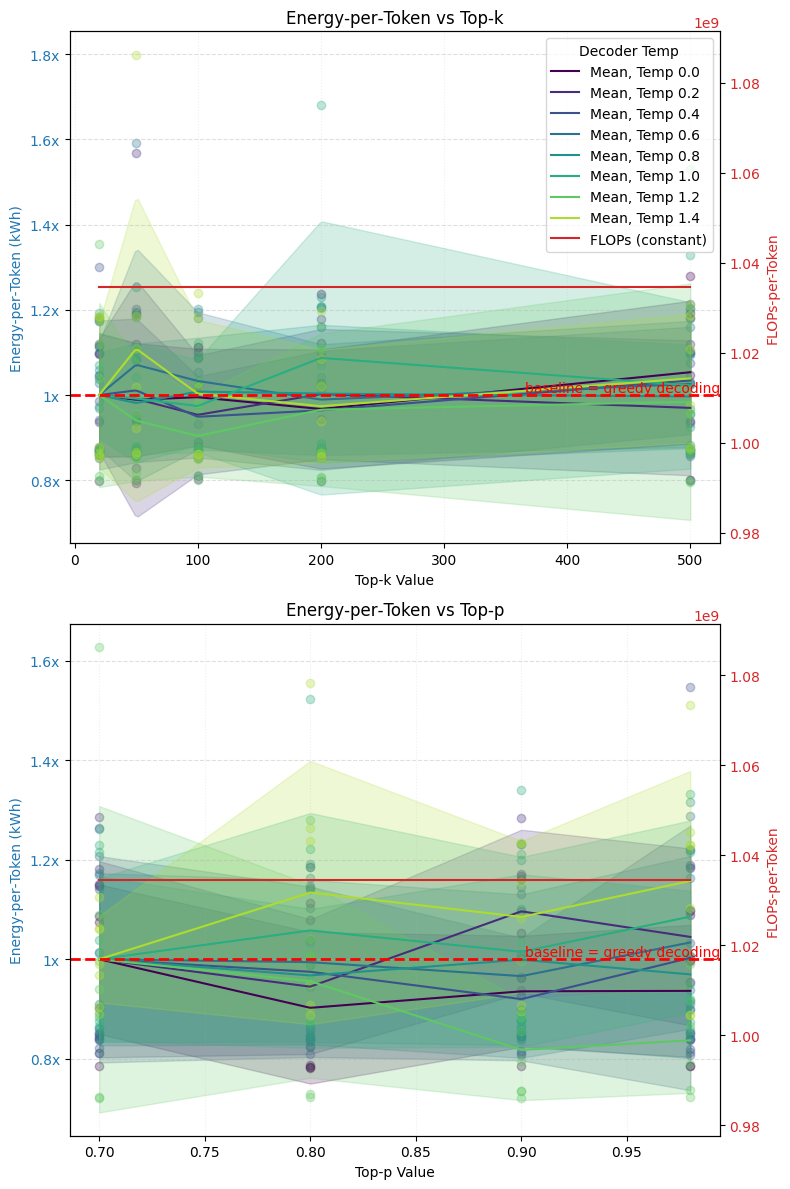

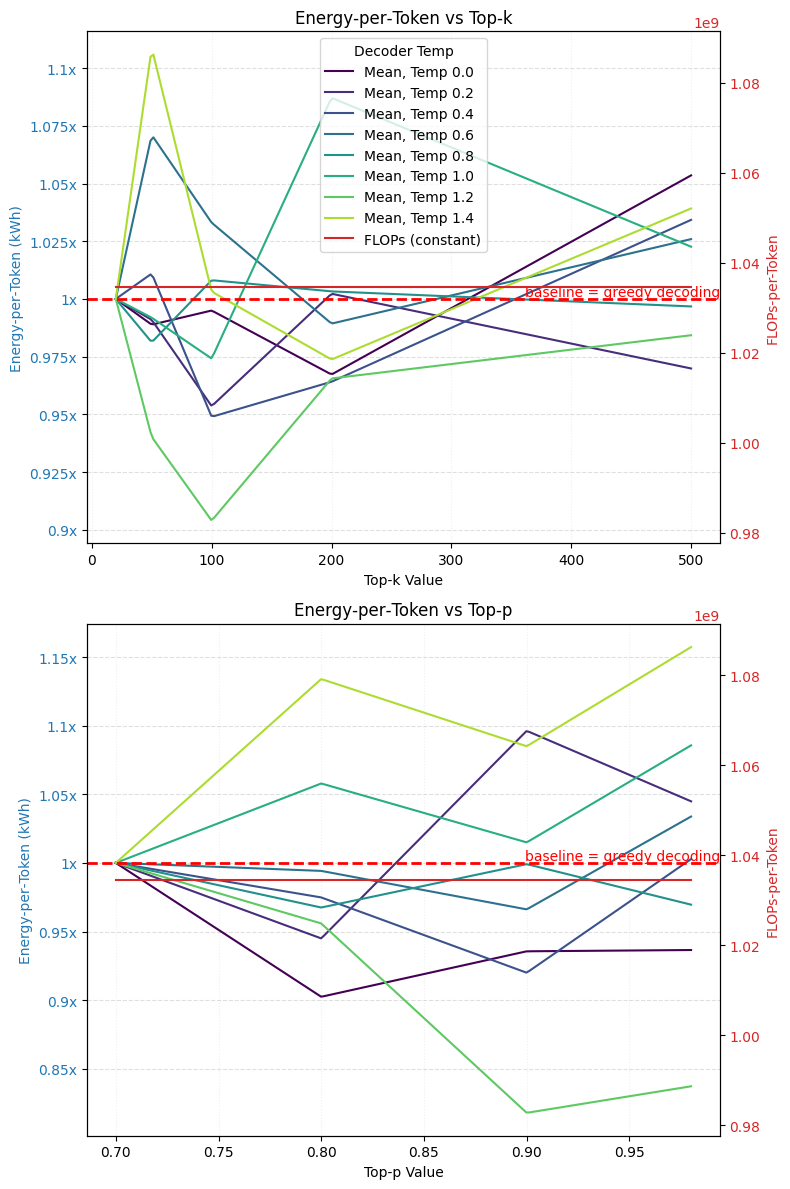

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:616: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  series.index, vals,


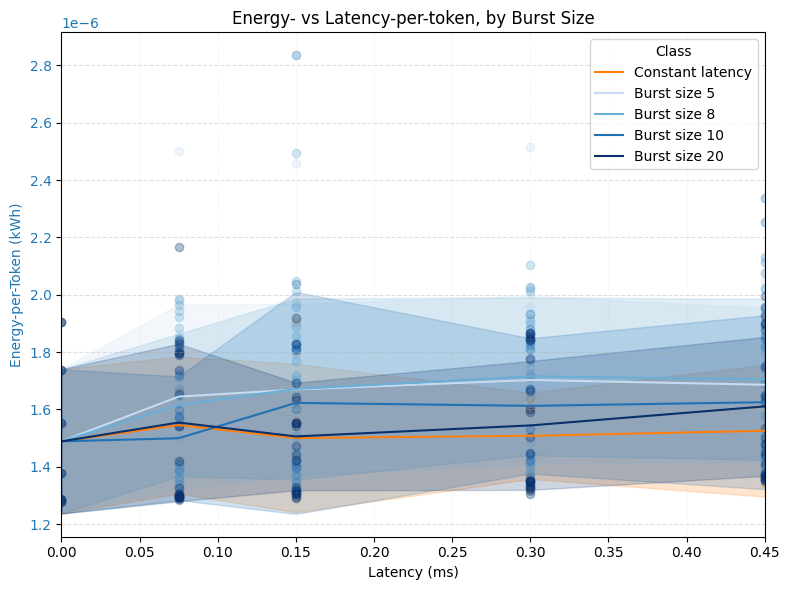

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:616: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  series.index, vals,


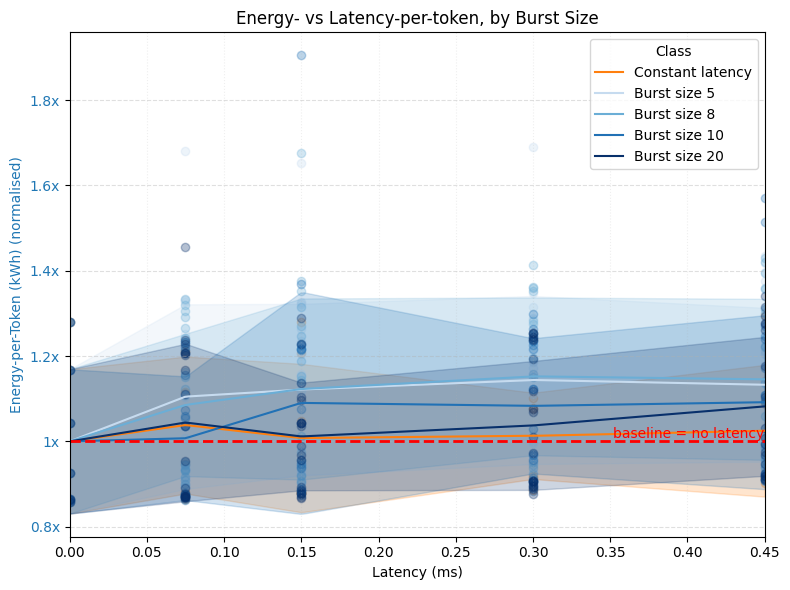

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:616: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  series.index, vals,


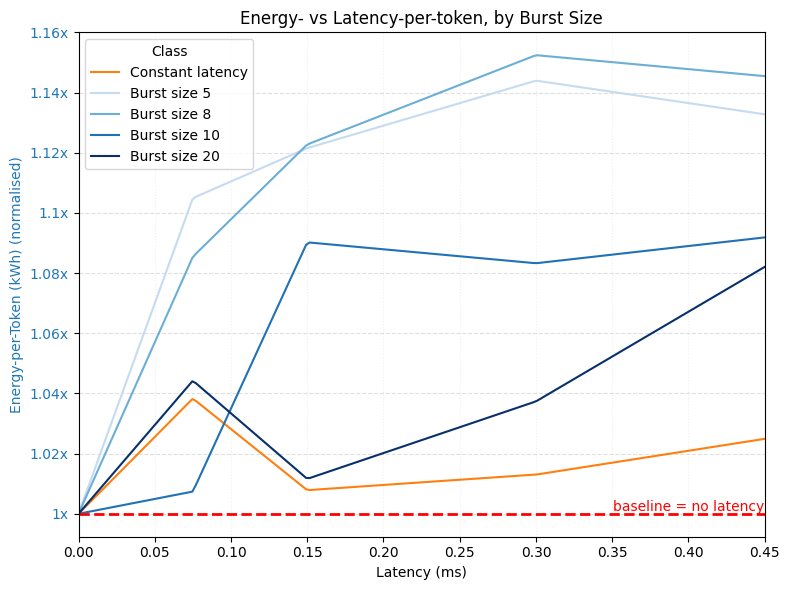

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:686: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.tight_layout()


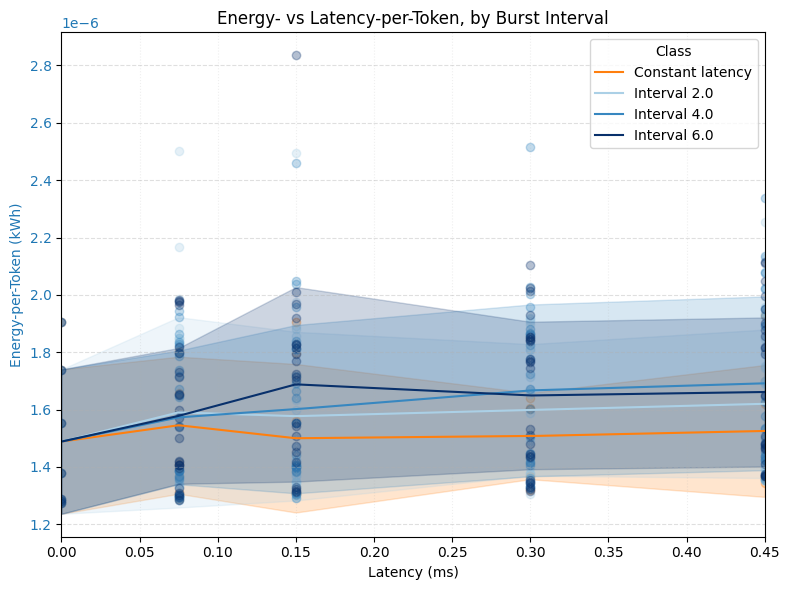

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:686: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.tight_layout()


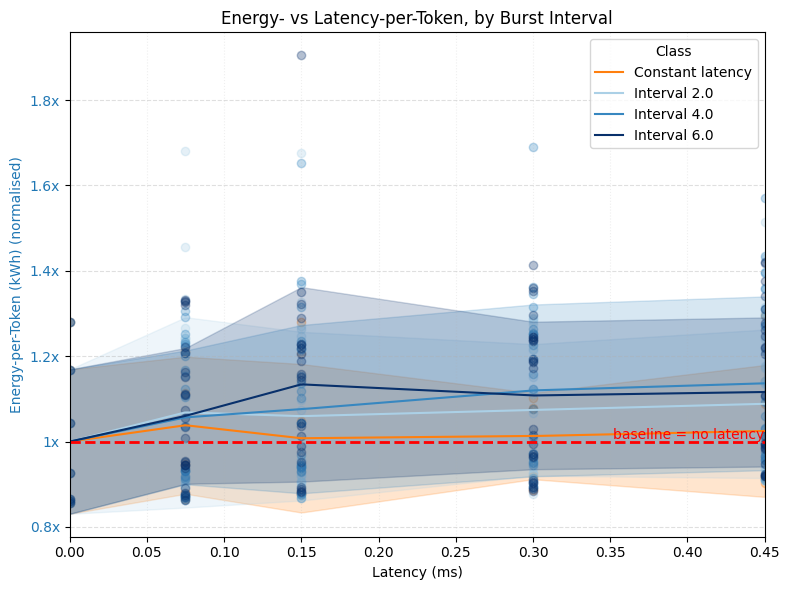

/Users/henrybaker/repositories/thesis_analysis/scripts/c_controlled_exp_visualisations.py:686: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.tight_layout()


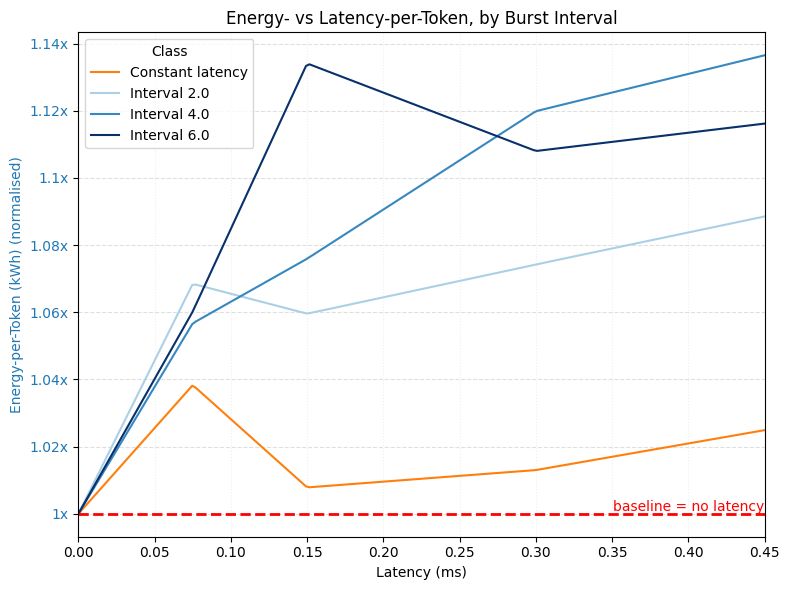

In [153]:
import numpy as np

import importlib
import scripts.c_controlled_exp_visualisations as viz
importlib.reload(viz)

from scripts.c_controlled_exp_visualisations import (
    plot_num_processes,
    plot_batching,
    plot_precision,
    plot_decoder_temperature,
    plot_decoder_topk_top_p,
    plot_latency_by_burst_interval,
    plot_latency_by_burst_size,
    plot_all_vizs,
)

configs = ['num_processes', 'batching','precis', 'decoding', 'latency']
dfs = {config: df[df['config_name'].str.startswith(config)] for config in configs}
plot_all_vizs(dfs)

# Modeling

TO DO: WORK OUT % OF TOTAL ENERGY CONSUMPTION / VARIANCE THAT CAN BE EXPLAINED BY TOTAL CONFIGS CHANGES VS BASELINE THAT IS MODEL DETERMINED


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.274
Model:                              OLS   Adj. R-squared:                  0.205
Method:                   Least Squares   F-statistic:                     3.958
Date:                  Sun, 20 Apr 2025   Prob (F-statistic):             0.0348
Time:                          00:06:18   Log-Likelihood:                 301.17
No. Observations:                    24   AIC:                            -596.3
Df Residuals:                        21   BIC:                            -592.8
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

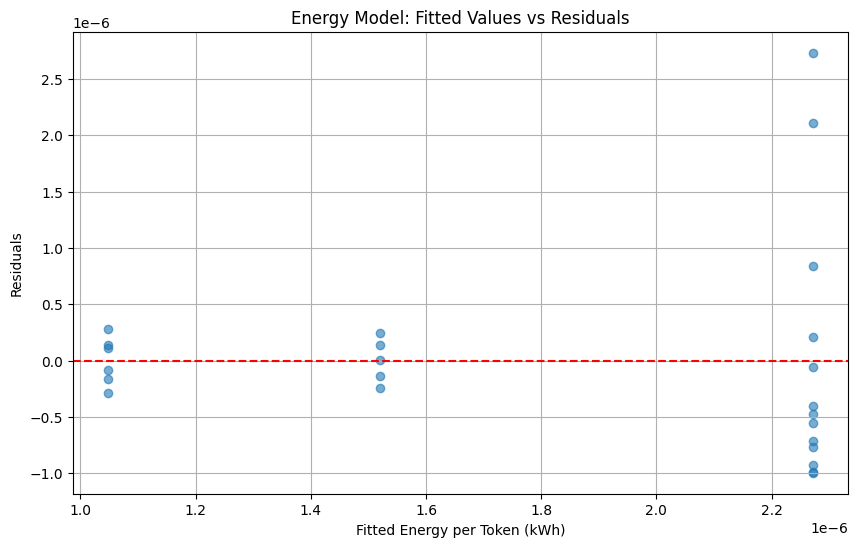


📊 Running OLS regression for energy_per_token_kwh...

                             OLS Regression Results                             
Dep. Variable:     energy_per_token_kwh   R-squared:                       0.274
Model:                              OLS   Adj. R-squared:                  0.205
Method:                   Least Squares   F-statistic:                     3.958
Date:                  Sun, 20 Apr 2025   Prob (F-statistic):             0.0348
Time:                          00:06:18   Log-Likelihood:                 301.17
No. Observations:                    24   AIC:                            -596.3
Df Residuals:                        21   BIC:                            -592.8
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

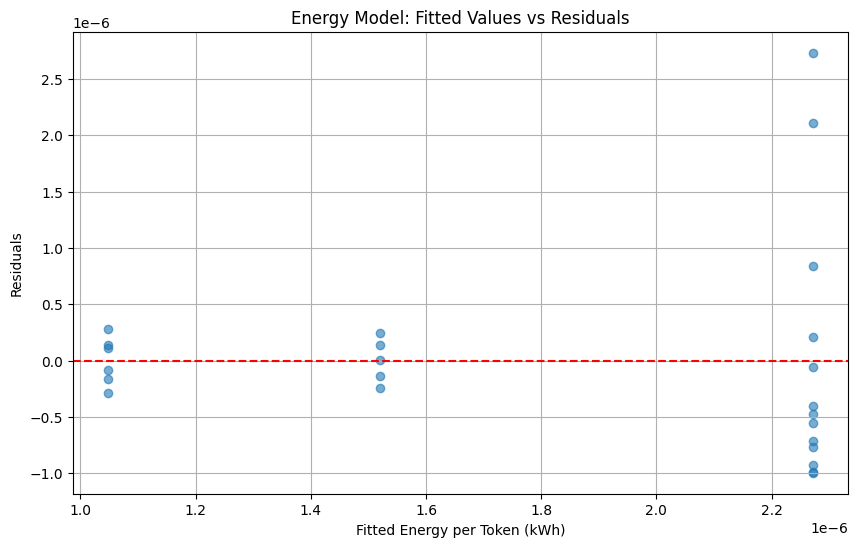

In [154]:
from scripts.d_base_regression import run_full_regression_analysis, preprocess_data

df = preprocess_data(df)

# With default predictors
run_full_regression_analysis(df)

# With custom predictors
custom_predictors = ["batch_size_numeric", "C(fp_precision)", "C(quantization)"]
run_full_regression_analysis(df, predictors=custom_predictors)


In [155]:
%run scripts/d_mixed_effects_model.py

Exception: File `'scripts/d_mixed_effects_model.py'` not found.

In [ ]:
df['energy_per_token_kwh'].max() -  df['energy_per_token_kwh'].min() 

Modelling to do
- [ ] set up hoerarchical model -> identify groupings:
   - [ ] use model (even though currently only one model)
   - [ ] use config_name and date_time
   - [ ] use decoder configs
   - [ ] latency configs 